<a href="https://colab.research.google.com/github/Pawan-Kumar-Sahu/ML-Library-1/blob/master/Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
d= pd.read_csv('mnist_train_small.csv',header = None)
data=np.array(d)
print (data)
Y = data[:,0]
print (Y)
X = data[:,1:]
print (X)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
[6 5 7 ... 2 9 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
class lin_reg():
    
    def train_test_split(self,dt,sp=0.6,randomize='False'):
        dt=np.array(dt)
        if randomize=='True':
            dt=list(dt)
            random.shuffle(dt)
            dt=np.array(dt)
        n=dt.shape[1]
        m=dt.shape[0]
        train_dt=dt[:int(sp*m),:]
        test_dt=dt[int(sp*m):,:]
        return train_dt,test_dt
    
    def hx_curve(self,show='False'):
        if show=='True':
            plt.scatter(self.y,self.hx)
            plt.xlabel("Values of Y values")
            plt.ylabel("Range of Prediction")
            plt.title(" Graph for Hypothesis VS Y values")
            plt.show()
    
    def detr_thres(self,show='False'):
        if show=='True':
            th=list(range(0,101))
            th=np.array(th)
            th=th/10
            accu=[]
            for i in th:
                accu.append(self.score(i))
            plt.plot(th,accu)
            plt.xlabel("Increasing Threshold Value" )
            plt.ylabel("Accuracy of Prediction")
            plt.title("Curve to Determine Threshold")
            plt.show()

    def score(self,t=4):
        self.p=self.y-self.hx
        self.p[self.p<-t]=-50
        self.p[self.p>t]=-50
        return (100*((len(self.p)-np.count_nonzero(self.p==-50))/len(self.p)))
    
    def hypo(self):
        self.hx = []
        self.hx = np.sum(self.theta[:-1]*self.x,axis=1)
        self.hx = self.hx + self.theta[-1]
    
    def part_j(self):
        self.diff = self.hx - self.y
        pj = self.x.T.dot(self.diff)
        w = list(pj)
        w.append(np.sum(self.diff))
        pj = np.array(w)
        return pj*(1/self.m)
    
    def cost(self):
        self.diff = self.hx - self.y
        return ((1/(2*self.m))*np.sum(pow(self.diff,2)))
    
    def improve(self):
        p_j=self.part_j()
        temp = self.theta - (self.lr*p_j)
        self.theta = temp
    
    def learn_curve(self,show='False'):
        if show=='True':
            plt.plot(self.learn_x,self.learn_j)
            plt.xlabel(" no. of iterations")
            plt.ylabel(" error ")
            plt.title(" LEARNING CURVE ")
            plt.show() 
    
    def pred_thres(self,ll=0.1,ul=0.9):
        predict=[]
        self.hypo()
        v1=self.hx-np.modf(self.hx)[1]
        for i in range(self.m):
            if 1-v1[i] <=ll:
                predict.append(int(self.hx[i]+1))
            elif v1[i] <ul:
                predict.append(int(self.hx[i]))
            else:
                predict.append(-1)
        predict=np.array(predict)
        p=self.y-predict
        ac=(np.count_nonzero(p==0)/self.m)*100
        return np.array(predict),ac
    
    def train(self,x,y,theta=[],itr=1000,lr=0.0000001):
        self.x=x
        self.y=y
        self.itr=itr
        self.lr=lr
        self.n=x.shape[1]
        self.m=x.shape[0]
        self.theta=theta
        if theta==[]:
            self.theta=list(np.zeros(self.n+1))
            self.n_o_b=0
            self.j_p_b=[]
            self.hypo()
            self.j_p_b.append(self.cost())
        self.n_o_b=self.n_o_b + 1
        self.learn_j=[]
        self.learn_x=[]
        i=0
        while i<self.itr:
            self.hypo()
            self.improve()
            self.learn_j.append(self.cost())
            self.learn_x.append(i)
            i = i+1
        j = self.cost()
        self.j_p_b.append(j)
    
    def learn_curve_mb(self,show='False'):
        if show=='True':
            plt.plot(np.array(list(range(self.n_o_b+1)))[1:],np.array(self.j_p_b)[1:])
            plt.xlabel(" Batch numbers")
            plt.ylabel(" error per batch ")
            plt.title(" LEARNING CURVE ")
            plt.show()
    
    def test(self,xt,yt):
        self.x=xt
        self.y=yt
        self.m=self.x.shape[0]
        self.hypo()
        jt=self.cost()
        return self.hx,jt
    
    def mini_batch_grad(self,x_all,y_all,batch_size=250,itr_b=1000,lr_b=0.00000001):
        n_loop=x_all.shape[0]/batch_size
        if n_loop!=int(n_loop):
            n_loop=int(n_loop)+1
        for i in range(int(n_loop)):
            if i==0:
                self.train(x_all[:batch_size,:],y_all[:batch_size],itr=itr_b,lr=lr_b)
            if i!=0 and i!=n_loop-1:
                self.train(x_all[batch_size*i:batch_size*(i+1),:],y_all[batch_size*i:batch_size*(i+1)],self.theta,itr=itr_b,lr=lr_b)
            if i==n_loop-1 and i!=0:
                self.train(x_all[batch_size*i:,:],y_all[batch_size*i:],self.theta,itr=itr_b,lr=lr_b)
                
    
obj=lin_reg()

In [0]:
train_data,test_data=obj.train_test_split(data,0.8,randomize='True')
print(train_data,train_data.shape)
print(test_data,test_data.shape)

In [0]:
#obj.train(X,Y,itr=10000,lr=0.00000001)

In [0]:
#obj.learn_curve(show='True')

In [49]:
obj.mini_batch_grad(X,Y,itr_b=10000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [0]:
d_n = pd.read_csv('mnist_test.csv',header = None)
data_n = np.array(d_n)
Y_n = data_n[:,0]
X_n = data_n[:,1:]

In [0]:
hypothesis , cost_val = obj.test(X_n,Y_n)
print(hypothesis)
print(cost_val)

In [0]:
obj.hx_curve(show='True')

In [0]:
obj.detr_thres(show='True')

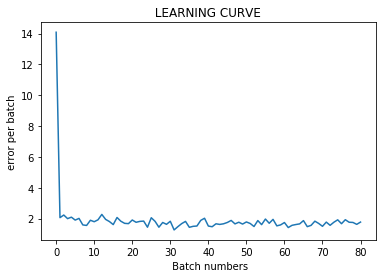

In [45]:
obj.learn_curve_mb(show='True')

In [35]:
print(obj.score(t=1))

40.129999999999995


In [36]:
prediction , accuracy = obj.pred_thres(0.01,0.99)
print(Y_n)
print(prediction)
print(accuracy)

[7 2 1 ... 4 5 6]
[5 1 0 ... 9 4 4]
23.53
